In [1]:
#question1

In [2]:
import pandas as pd
import numpy as np


In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

In [4]:
users = pd.read_csv(url, sep='|')

In [5]:
mean_occupation = users.groupby('occupation')['age'].mean()
print(mean_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [6]:
def male_ratio(x):
    if sum(x.gender == 'M') == 0:
        return 0
    else:
        return sum(x.gender == 'M') / len(x)
    
male_ratio_per_occupation = users.groupby('occupation').apply(male_ratio).sort_values(ascending=False)
print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
dtype: float64


In [7]:
min_max_age = users.groupby('occupation')['age'].agg([min, max])
print(min_max_age)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [12]:
mean_age_by_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print(mean_age_by_sex)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [15]:
total_count = users.groupby('occupation')['gender'].count()
male_count = users.groupby('occupation')['gender'].apply(lambda x: (x=='M').sum())
female_count = total_count - male_count
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100
gender_percentage = pd.concat([male_percentage, female_percentage], axis=1)
gender_percentage.columns = ['Male %', 'Female %']
print(gender_percentage)

                   Male %   Female %
occupation                          
administrator   54.430380  45.569620
artist          53.571429  46.428571
doctor         100.000000   0.000000
educator        72.631579  27.368421
engineer        97.014925   2.985075
entertainment   88.888889  11.111111
executive       90.625000   9.375000
healthcare      31.250000  68.750000
homemaker       14.285714  85.714286
lawyer          83.333333  16.666667
librarian       43.137255  56.862745
marketing       61.538462  38.461538
none            55.555556  44.444444
other           65.714286  34.285714
programmer      90.909091   9.090909
retired         92.857143   7.142857
salesman        75.000000  25.000000
scientist       90.322581   9.677419
student         69.387755  30.612245
technician      96.296296   3.703704
writer          57.777778  42.222222


In [16]:
#Question 2

In [17]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

In [18]:
euro12 = pd.read_csv(url)

In [19]:
goals = euro12['Goals']

In [20]:
teams = euro12['Team'].count()
print("The number of teams participated in Euro2012 is", teams)

The number of teams participated in Euro2012 is 16


In [21]:
cols = len(euro12.columns)
print("The number of columns in the dataset is", cols)

The number of columns in the dataset is 35


In [31]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]

In [32]:
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
print(discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


In [25]:
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("The mean Yellow Cards given per Team is", mean_yellow_cards)

The mean Yellow Cards given per Team is 7.4375


In [27]:
high_scoring_teams = euro12[euro12['Goals'] > 6][['Team', 'Goals']]
print(high_scoring_teams)

       Team  Goals
5   Germany     10
13    Spain     12


In [33]:
teams_g = euro12[euro12['Team'].str.startswith('G')][['Team']]
print(teams_g)

      Team
5  Germany
6   Greece


In [34]:
first_seven_cols = euro12.iloc[:, :7]
print(first_seven_cols)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [35]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


In [36]:
#Question 3

In [37]:
#the first Series
s1 = pd.Series(np.random.randint(1, 5, 100))

#the second Series
s2 = pd.Series(np.random.randint(1, 4, 100))

#the third Series
s3 = pd.Series(np.random.randint(10000, 30001, 100))

In [38]:
df = pd.concat([s1, s2, s3], axis=1)

In [39]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

In [40]:
bigcolumn = pd.concat([s1, s2, s3], axis=0)
bigcolumn = bigcolumn.to_frame()

In [41]:
print(bigcolumn.index[-1]) 

99


In [42]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn.index = pd.RangeIndex(start=0, stop=300, step=1)
print(bigcolumn)

         0
0        3
1        2
2        3
3        1
4        3
..     ...
295  18821
296  28251
297  14996
298  21604
299  27274

[300 rows x 1 columns]


In [43]:
#question 4
import pandas as pd
import datetime

In [44]:
data_url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'
data = pd.read_csv(data_url, sep = "\s+", parse_dates = [[0,1,2]]) 
data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [45]:
import datetime

def fix_century(x):
  year = x.year - 100 if x.year > 1989 else x.year
  return datetime.date(year, x.month, x.day)

data['Yr_Mo_Dy'] = data['Yr_Mo_Dy'].apply(fix_century)

data.head()

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [46]:
data["Yr_Mo_Dy"] = pd.to_datetime(data["Yr_Mo_Dy"])

data = data.set_index('Yr_Mo_Dy')

data.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [47]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [48]:
data.shape[0] - data.isnull().sum()

data.notnull().sum()

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

In [49]:
data.sum().sum() / data.notna().sum().sum()

10.227883764282167

In [50]:
data.describe(percentiles=[])

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


In [51]:
day_stats = pd.DataFrame()

day_stats['min'] = data.min(axis = 1) # min
day_stats['max'] = data.max(axis = 1) # max 
day_stats['mean'] = data.mean(axis = 1) # mean
day_stats['std'] = data.std(axis = 1) # standard deviations

day_stats.head()

,min,max,mean,std
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356


In [52]:
data.loc[data.index.month == 1].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [53]:
data.groupby(data.index.to_period('A')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961,12.299583,10.351796,11.362369,6.958227,10.881763,7.729726,9.733923,8.858788,8.647652,9.835577,13.502795,13.680773
1962,12.246923,10.110438,11.732712,6.960440,10.657918,7.393068,11.020712,8.793753,8.316822,9.676247,12.930685,14.323956
1963,12.813452,10.836986,12.541151,7.330055,11.724110,8.434712,11.075699,10.336548,8.903589,10.224438,13.638877,14.999014
1964,12.363661,10.920164,12.104372,6.787787,11.454481,7.570874,10.259153,9.467350,7.789016,10.207951,13.740546,14.910301
1965,12.451370,11.075534,11.848767,6.858466,11.024795,7.478110,10.618712,8.879918,7.907425,9.918082,12.964247,15.591644
1966,13.461973,11.557205,12.020630,7.345726,11.805041,7.793671,10.579808,8.835096,8.514438,9.768959,14.265836,16.307260
1967,12.737151,10.990986,11.739397,7.143425,11.630740,7.368164,10.652027,9.325616,8.645014,9.547425,14.774548,17.135945
1968,11.835628,10.468197,11.409754,6.477678,10.760765,6.067322,8.859180,8.255519,7.224945,7.832978,12.808634,15.017486
1969,11.166356,9.723699,10.902000,5.767973,9.873918,6.189973,8.564493,7.711397,7.924521,7.754384,12.621233,15.762904


In [54]:
data.groupby(data.index.to_period('M')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01,14.841333,11.988333,13.431613,7.736774,11.072759,8.588065,11.184839,9.245333,9.085806,10.107419,13.880968,14.703226
1961-02,16.269286,14.975357,14.441481,9.230741,13.852143,10.937500,11.890714,11.846071,11.821429,12.714286,18.583214,15.411786
1961-03,10.890000,11.296452,10.752903,7.284000,10.509355,8.866774,9.644194,9.829677,10.294138,11.251935,16.410968,15.720000
1961-04,10.722667,9.427667,9.998000,5.830667,8.435000,6.495000,6.925333,7.094667,7.342333,7.237000,11.147333,10.278333
1961-05,9.860968,8.850000,10.818065,5.905333,9.490323,6.574839,7.604000,8.177097,8.039355,8.499355,11.900323,12.011613
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08,9.645161,8.259355,9.032258,4.502903,7.368065,5.935161,5.650323,5.417742,7.241290,5.536774,10.466774,12.054194
1978-09,10.913667,10.895000,10.635000,5.725000,10.372000,9.278333,10.790333,9.583000,10.069333,8.939000,15.680333,19.391333
1978-10,9.897742,8.670968,9.295806,4.721290,8.525161,6.774194,8.115484,7.337742,8.297742,8.243871,13.776774,17.150000


In [55]:
data.groupby(data.index.to_period('W')).mean()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1960-12-26/1961-01-01,15.040000,14.960000,13.170000,9.290000,NaN,9.870000,13.670000,10.250000,10.830000,12.580000,18.500000,15.040000
1961-01-02/1961-01-08,13.541429,11.486667,10.487143,6.417143,9.474286,6.435714,11.061429,6.616667,8.434286,8.497143,12.481429,13.238571
1961-01-09/1961-01-15,12.468571,8.967143,11.958571,4.630000,7.351429,5.072857,7.535714,6.820000,5.712857,7.571429,11.125714,11.024286
1961-01-16/1961-01-22,13.204286,9.862857,12.982857,6.328571,8.966667,7.417143,9.257143,7.875714,7.145714,8.124286,9.821429,11.434286
1961-01-23/1961-01-29,19.880000,16.141429,18.225714,12.720000,17.432857,14.828571,15.528571,15.160000,14.480000,15.640000,20.930000,22.530000
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-11-27/1978-12-03,14.934286,11.232857,13.941429,5.565714,10.215714,8.618571,9.642857,7.685714,9.011429,9.547143,11.835714,18.728571
1978-12-04/1978-12-10,20.740000,19.190000,17.034286,9.777143,15.287143,12.774286,14.437143,12.488571,13.870000,14.082857,18.517143,23.061429
1978-12-11/1978-12-17,16.758571,14.692857,14.987143,6.917143,11.397143,7.272857,10.208571,7.967143,9.168571,8.565714,11.102857,15.562857


In [59]:
weekly = data.resample('W').agg(['min','max','mean','std'])

weekly.loc[weekly.index[1:53], "RPT":"MAL"] .head(10)


RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Yr_Mo_Dy                                                                 
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   
1961-02-05  10.58  24.21  16.827143  5.251408   9.46  24.21  15.460000   
1961-02-12  16.00  24.54  19.684286  3.587677  11.54  21.42  16.417143   
1961-02-19   6.04  22.50  15.130000  5.064609  11.63  20.17  15.091429   
1961-02-26   7.79  25.80  15.221429  7.020716   7.08  21.50  13.625714   
1961-03-05  10.96  13.33  12.101429  0.997721   8.83  17.00  12.951429   
1961-03-12   4.88  14.79   9.376667  3.732263   8.08  16.96  11.578571   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Yr_Mo_Dy                            ...                                      
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148945   7.08  19.50  ...   7.571429  4.084293   5.25  20.71   
1961-01-22  3.837785   7.29  20.79  ...   8.124286  4.783952   6.50  15.92   
1961-01-29  5.170224  12.67  25.84  ...  15.640000  3.713368  14.04  27.71   
1961-02-05  5.187395   9.04  19.70  ...   9.460000  2.839501   9.17  19.33   
1961-02-12  3.608373  13.67  21.34  ...  14.440000  1.746749  15.21  26.38   
1961-02-19  3.575012   6.13  19.41  ...  13.542857  2.531361  14.09  29.63   
1961-02-26  5.147348   6.08  22.42  ...  12.730000  4.920064   9.59  23.21   
1961-03-05  2.851955   8.17  13.67  ...  12.370000  1.593685  11.58  23.45   
1961-03-12  3.230167   7.54  16.38  ...  10.458571  3.655113  10.21  22.71   

                                   MAL                              
                 mean       std    min    max       mean       std  
Yr_Mo_Dy                                                            
1961-01-08  12.481429  4.349139  10.88  16.46  13.238571  1.773062  
1961-01-15  11.125714  5.552215   5.17  16.92  11.024286  4.692355  
1961-01-22   9.821429  3.626584   6.79  17.96  11.434286  4.237239  
1961-01-29  20.930000  5.210726  17.50  27.63  22.530000  3.874721  
1961-02-05  14.012857  4.210858   7.17  19.25  11.935714  4.336104  
1961-02-12  21.832857  4.063753  17.04  21.84  19.155714  1.828705  
1961-02-19  21.167143  5.910938  10.96  22.58  16.584286  4.685377  
1961-02-26  16.304286  5.091162   6.67  23.87  14.322857  6.182283  
1961-03-05  17.842857  4.332331   8.83  17.54  13.951667  3.021387  
1961-03-12  16.701429  4.358759   5.54  22.54  14.420000  5.769890  

[10 rows x 48 columns]

In [60]:
#question 5

In [61]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

In [62]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [63]:
print(chipo.shape[0])

4622


In [64]:
print(chipo.shape[1])

5


In [65]:
print(chipo.columns)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [66]:
most_ordered = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False).index[0]
print(most_ordered)

Chicken Bowl


In [67]:
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().sort_values(ascending=False)[0]
print(most_ordered_quantity)

761


In [68]:
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().sort_values(ascending=False).index[0]
print(most_ordered_choice)

[Diet Coke]


In [69]:
total_items_ordered = chipo['quantity'].sum()
print(total_items_ordered)

4972


In [71]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

print(chipo['item_price'].dtype)

float64


In [73]:
revenue = (chipo['quantity'] * chipo['item_price']).sum()
print(round(revenue, 2))

39237.02


In [74]:
ordernumbers = chipo['order_id'].nunique()
print(ordernumbers)

1834


In [75]:
avg_revenue_per_order = revenue / ordernumbers
print(round(avg_revenue_per_order, 2))

21.39


In [76]:
number_of_items_sold = chipo['item_name'].nunique()
print(number_of_items_sold)

50


In [77]:
#question 6

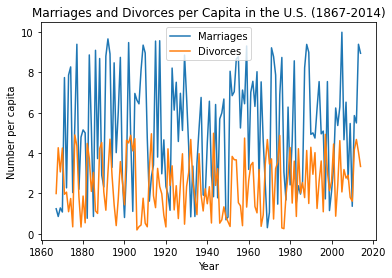

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
years = np.arange(1867, 2015)
marriages_per_capita = np.random.uniform(low=0.1, high=10.0, size=len(years))
divorces_per_capita = np.random.uniform(low=0.1, high=5.0, size=len(years))

# Create the line plot
plt.plot(years, marriages_per_capita, label='Marriages')
plt.plot(years, divorces_per_capita, label='Divorces')

# Add axis labels and legend
plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.legend()

# Show the plot
plt.show()

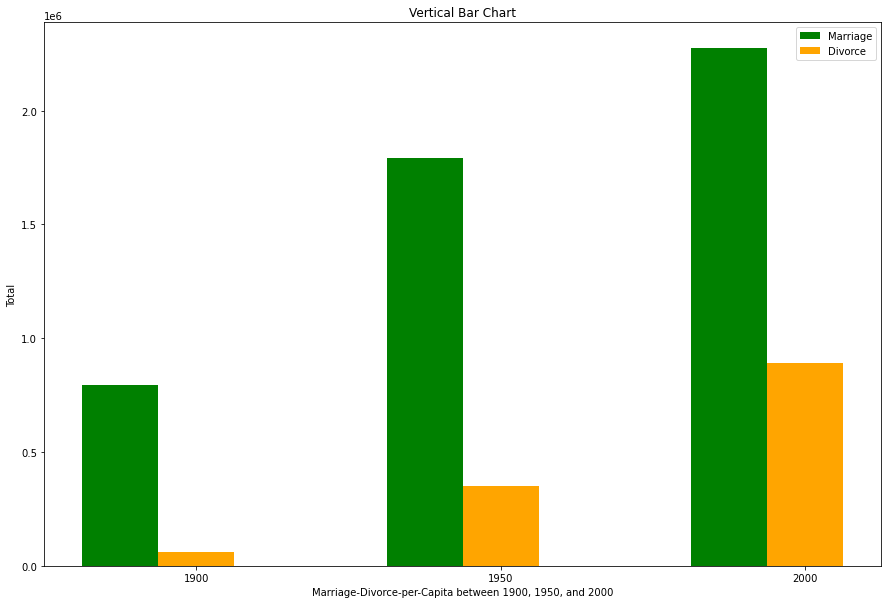

In [81]:
#question 7
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[15, 10])

marriage = [795200, 1792500, 2275000]
divorce = [61000, 352000, 890000]

X = np.arange(len(marriage))

plt.bar(X, marriage, color = 'green', width = 0.25)
plt.bar(X + 0.25, divorce, color = 'orange', width = 0.25)

plt.legend(['Marriage', 'Divorce'])

plt.xticks([i + 0.25 for i in range(3)], ['1900', '1950', '2000'])

plt.title("Vertical Bar Chart")

plt.xlabel('Marriage-Divorce-per-Capita between 1900, 1950, and 2000')
plt.ylabel('Total')

plt.show()

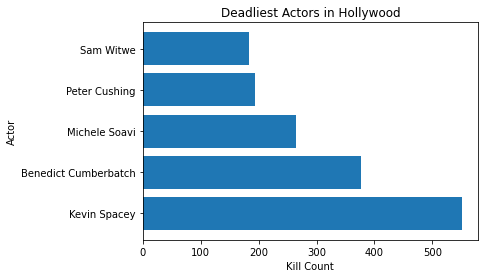

In [82]:
#Quesion 8

actors = ['Kevin Spacey', 'Benedict Cumberbatch', 'Peter Cushing', 'Michele Soavi', 'Sam Witwe']
total_kill = [551, 376, 193, 265, 183]

data = sorted(zip(total_kill, actors), reverse=True)

total_kill, actors = zip(*data)

plt.barh(actors, total_kill)

plt.xlabel('Kill Count')

plt.ylabel('Actor')

plt.title('Deadliest Actors in Hollywood')

plt.show()

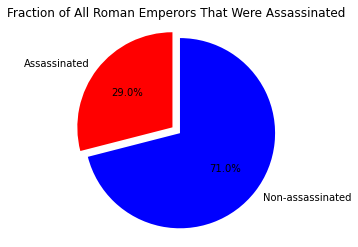

In [83]:
#question 9

assassinated_emperors = 29
non_assassinated_emperors = 71
total_emperors = assassinated_emperors + non_assassinated_emperors

assassinated_percent = assassinated_emperors / total_emperors * 100
non_assassinated_percent = non_assassinated_emperors / total_emperors * 100

labels = ['Assassinated', 'Non-assassinated']
sizes = [assassinated_percent, non_assassinated_percent]
colors = ['red', 'blue']
explode = (0.1, 0)  # explode the first slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Fraction of All Roman Emperors That Were Assassinated')

plt.show()

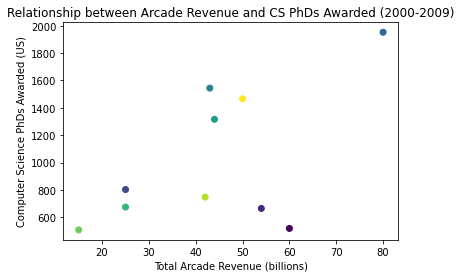

In [84]:
#question 10

revenue = np.random.randint(0, 100, size=10)  # total revenue earned by arcades in billions
phds = np.random.randint(0, 2000, size=10)  # number of CS PhDs awarded in the US
years = np.arange(2000, 2010)  # years between 2000 and 2009

plt.scatter(revenue, phds, c=years)

plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science PhDs Awarded (US)')
plt.title('Relationship between Arcade Revenue and CS PhDs Awarded (2000-2009)')

plt.show()